In [1]:
#libaraies 
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

In [42]:
 #Global scope 
 maxfes = 1000  # Maximum functions evaluation
 dim = 4  # Number of design variables
 SearchAgents_no = 5  # Population size
 Max_iter = math.floor(maxfes / SearchAgents_no)  # Maximum number of iterations
 lb = -5.12 * np.ones(dim)  # lower bound
 ub = 5.12 * np.ones(dim)  # upper bound

In [43]:
#calculate fitness value 
def fitness(particle):
    y = 0
    for i in range(dim):
      if y > 5.12 or y < -5.12:
        y= y+ 10*i + 10*particle[i]**2 # the function   
      else: y =y+ 10*i + particle[i] ** 2 - 10 * math.cos(2 * math.pi * particle[i])

    return y

In [48]:
def rao():

  # initialzing arrays to store the values 
 Positions = np.zeros((SearchAgents_no, dim))   # search agent position
 best_pos = np.zeros(dim)  # search agent's best position
 worst_pos = np.zeros(dim)  # search agent's worst position

 finval = np.zeros(Max_iter)  # best score of each iteration
 f1 = np.zeros(SearchAgents_no)  # function value of current population
 f2 = np.zeros(SearchAgents_no)  # function value of updated population

 
 for i in range(dim):
    Positions[:, i] = np.random.uniform(0, 1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
 for k in range(0, Max_iter):
    best_score = float("inf")
    worst_score = float("-inf")
    for i in range(0, SearchAgents_no):
        # Return back the search agents that go beyond the boundaries of the search space
        for j in range(dim):
            Positions[i, j] = np.clip(Positions[i, j], lb[j], ub[j])
        f1[i] = fitness(Positions[i, :])
        if f1[i] < best_score:
            best_score = f1[i].copy()  # Update best
            best_pos = Positions[i, :].copy()
        if f1[i] > worst_score:
            worst_score = f1[i].copy();  # Update worst
            worst_pos = Positions[i, :].copy()
    # Update the Position of search agents including omegas
    finval[k] = best_score
    #print("The best solution is: ", best_score, " in iteration number: ", k + 1)
    Positioncopy = Positions.copy()
    for i in range(0, SearchAgents_no):
        for j in range(0, dim):
            r1 = random.random()  # r1 is a random number in [0,1]
            Positions[i, j] = Positions[i, j] + r1 * (best_pos[j] - worst_pos[j])  # change in position
            Positions[i, j] = np.clip(Positions[i, j], lb[j], ub[j])
        f2[i] = fitness(Positions[i, :])
    for i in range(0, SearchAgents_no):
        if f1[i] < f2[i]:
            Positions[i, :] = Positioncopy[i, :]
 best_score = np.amin(finval)
 #finval.append(best_score) 
 #finval[Max_iter]=best_score
 #print("______")
 #print(finval)
 #print("The final best from all iteration is: ", best_score)
 #print("_____")
 #return best_score 
 return np.append(finval,best_score)


Enter the number of trials: 10
[[112.5835197  112.5835197  112.5835197  ...  50.47250989  47.43515114
   47.43515114]
 [177.92982802 162.83900984 139.76379869 ...  35.87495914  35.87495913
   35.87495913]
 [177.61470849 177.61470849  93.09011246 ...  24.90808264  24.90609814
   24.90609814]
 ...
 [139.55160293 139.55160293  64.44119938 ...  39.38850612  39.38850612
   39.38850612]
 [ 90.10015972  90.10015972  90.10015972 ...  24.88418822  24.88418822
   24.88418822]
 [183.10683077 138.58553931 107.01886461 ...  33.9687138   33.96849324
   33.96849324]]


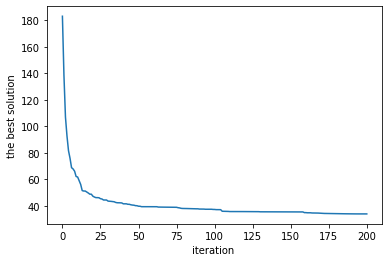

In [50]:
#the main 

tr = int(input('Enter the number of trials: '))
best_arr = np.zeros((tr+1, Max_iter+1))
for i in range(tr):
  bestsc = rao()
  #print("*********")
  #print(bestsc)
  #print("The trial best is: ",  bestsc)
  #print("----------------------------------: ")
  best_arr[i]=bestsc;
#print(best_arr)
for k in range(0, Max_iter+1):
  colm = best_arr[:,k]
  best_arr[tr][k]= np.average(colm[1:tr])
  #print("@@@@@")
  #print(best_arr[tr][k])
  #print("@@@@@")
  #best_arr[tr][k] = np.apped(best_arr[tr][k],np.amin(colm)) 
print(best_arr)
  
  

 
  
 
plt.plot(best_arr[tr])
plt.xlabel('iteration ')
plt.ylabel('the best solution')
plt.show()
